<a href="https://colab.research.google.com/github/gcmillar/CEUS/blob/master/gcmillar_CEUS_Space_time_analytics_JupyterNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
#        **Space-time Analytics of Human Physiology for Urban Planning**
---
---

## Paper
This is code and data for computational reproducibility of the following paper:
> **Garrett C. Millar**, Ondrej Mitas, Wilco Boode Lisette Hoeke, Joost de Kruijff, Anna Petrasova, Helena Mitasova (2020): 
Space-time Analytics of Human Physiology for Urban Planning. In: Computers, Environment, and Urban Sytstems, In: *Advances in portable sensing methodologies for urban environments: Understanding cities from a mobility perspective*. 
[DOI here]

## Code
This is a modified version of a notebook for reproducibility of the applied methodological framework applied in the Millar et al. 2020 paper. The original notebook is at https://colab.research.google.com/github/gcmillar/CEUS/blob/master/PeopleEnvironmentGrassGIS.ipynb

The tools implementing the published methods are available at https://grass.osgeo.org/grass7/manuals/addons/.

## Run Notes
Click play button in upper left corner of code window to run script: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/codebutton.png" alt="runbutton" width="14" height="14">
<!-- ![alt text](https://raw.githubusercontent.com/gcmillar/CEUS/master/img/codebutton.png "Logo Title Text 1") -->

Code cells with long computational times: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">


## Directory Structure

<mark>... do if time ...</mark>

<!-- The three elements of an algorithm are code, data and results. Code processes the data and outputs the results. In addition to that, we also specify the required runtime environment and metadata. This is how these elements map to the capsule file system:

*   **Code** goes in the Code pane. Your code will be copied to the code directory at the beginning of each run.
*   **Data** goes in the Data pane. Your data will be copied to the /data directory at the beginning of each run.
*   **Results** include any plots, figures, and resulting data, which should be saved in the /results directory. At the end of the run, these files will appear in the Results pane where you can view and download them. -->

---

# Software: **R**

---

Very first, and most needed step, load cell magic for R, and then begin each R-script cell with: `%%R`  

In [0]:
# activate R magic
%load_ext rpy2.ipython

## Setup

In [0]:
import warnings
# warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

### GDAL & Colaboratory Notebooks 

Need to setup the colaboratory notebook with GDAL, to be used in R. As this will be running on a ubuntu server, run 
*   `apt-get update`
*   `apt-get install libgdal-dev` 
    *   – run this before trying to install GDAL otherwise you will get errors.
    * The flag -y accepts the download and runs – this is the longest part (but not too long)
*   Install python-gdal again with the -y flag
*   Install NumPy and SciPy (not compulsory, but why not?)
*   Test the installation by importing GDAL. No error? It should be ok.

> **NOTE**: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">

In [0]:
%%capture
#Step 1
!apt-get update
#Step 2
!apt-get install libgdal-dev -y
#Step 3
!apt-get install python-gdal -y
#Step 4
!apt-get install python-numpy python-scipy -y
#Step 5
import gdal 

#### Install GDAL in R

In [0]:
%%R
install.packages("rgdal")
library(rgdal);

### Install Required R Packages 
> **NOTE**: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">

In [0]:
%%capture
%%R
options(digits = 8)
if (!require(dplyr)) {install.packages("dplyr"); library(dplyr)}
if (!require(tidyr)) {install.packages("tidyr"); library(tidyr)}
if (!require(sp)) {install.packages("sp"); library(sp)}
if (!require(raster)) {install.packages("raster"); library(raster)}
if (!require(rgeos)) {install.packages("rgeos"); library(rgeos)}
if (!require(rgbif)) {install.packages("rgbif"); library(rgbif)}
if (!require(viridis)) {install.packages("viridis"); library(viridis)}
if (!require(gridExtra)) {install.packages("gridExtra"); library(gridExtra)}
if (!require(R.matlab)) {install.packages("R.matlab"); library(R.matlab)}
if (!require(plyr)) {install.packages("plyr"); library(plyr)}
if (!require(data.table)) {install.packages("data.table"); library(data.table)}
if (!require(maptools)) {install.packages("maptools"); library(maptools)}
if (!require(spatstat)) {install.packages("spatstat"); library(spatstat)}
if (!require(rasterVis)) {install.packages("rasterVis"); library(rasterVis)}
if (!require(leaflet)) {install.packages("leaflet"); library(leaflet)}
if (!require(RColorBrewer)) {install.packages("RColorBrewer"); library(RColorBrewer)}
if (!require(scales)) {install.packages("scales"); library(scales)}
if (!require(spgwr)) {install.packages("spgwr"); library(spgwr)}
if (!require(gdalUtils)) {install.packages("gdalUtils"); library(gdalUtils)}
if (!require(devtools)) {install.packages("devtools"); library(devtools)}
if (!require(tidyverse)) {install.packages("tidyverse"); library(tidyverse)}
if (!require(sf)) {install.packages("sf"); library(sf)}
if (!require(ggmap)) {install.packages("ggmap"); library(ggmap)}
if (!require(formatR)) {install.packages("formatR"); library(formatR)}
if (!require(stats)) {install.packages("stats"); library(stats)}
if (!require(data.table)) {install.packages("data.table"); library(data.table)}
if (!require(lubridate)) {install.packages("lubridate"); library(lubridate)}
if (!require(ggplot2)) {install.packages("ggplot2"); library(ggplot2)}
if (!require(grid)) {install.packages("grid"); library(grid)}
if (!require(gridExtra)) {install.packages("gridExtra"); library(gridExtra)}
if (!require(lattice)) {install.packages("lattice"); library(lattice)}
if (!require(leaflet)) {install.packages("leaflet"); library(leaflet)}
if (!require(lme4)) {install.packages("lme4"); library(lme4)}
if (!require(corrgram)) {install.packages("corrgram"); library(corrgram)}
if (!require(psych)) {install.packages("psych"); library(psych)};

## Data Processing

Read in CEUS Initial Cyclist Data [.csv]; using [online link from GitHub](https://raw.githubusercontent.com/gcmillar/CEUS/master/CHIPS_all.csv):

> **File Description**: Initial dataset for CEUS analysis (.csv of cyclists' location and physiological data) 

> **Note**: This data is read in under the assumption the raw skin conductance signals have been properly processed in Ledalab--MATLAB-based software for the analysis of raw EDA data. This process used a moving window of 20 seconds to identify deviations of 3 standard deviations or more as potential motion artifacts. Deviations were visually inspected and if they failed to conform to a standard, physiologically-plausible shape for a SCR, were replaced with linear interpolation. Cleaned data were then deconvoluted using the Ledalab toolbox into phasic and tonic components. After deconvolution, we can now proceed with the data representing the phasic component, where the physiological data are georeferenced through a time-based synchronization of the SCR data with GPS location data.
<!-- ~~~ -->
 <!-- **File Description**: Initial dataset for CEUS analysis (.csv of cyclists' location and physiological data)  -->
<!-- ~~~ -->


In [6]:
# import csv
!wget "https://raw.githubusercontent.com/gcmillar/CEUS/master/CHIPS_all.csv"

--2020-01-26 15:36:13--  https://raw.githubusercontent.com/gcmillar/CEUS/master/CHIPS_all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24581967 (23M) [text/plain]
Saving to: ‘CHIPS_all.csv’

CHIPS_all.csv       100%[===================>]  23.44M   135MB/s    in 0.2s    

2020-01-26 15:36:13 (135 MB/s) - ‘CHIPS_all.csv’ saved [24581967/24581967]



In [7]:
%%R
setwd("/content/")
CHIPS_df <- read.table("CHIPS_all.csv", header = TRUE, row.names=NULL, sep=",")
setnames(CHIPS_df, "long", "lon")
head(CHIPS_df)

  participant time conductance conductance_z      phasic    phasic_z      tonic
1           1 0.00    0.793927    -1.3018331 0.066627671 0.009995110 0.72729933
2           1 0.25    0.797768    -1.3012050 0.070468671 0.010623231 0.72729933
3           1 0.50    0.793927    -1.3018331 0.066710821 0.010000283 0.72721618
4           1 0.75    0.793927    -1.3018331 0.066901547 0.010013549 0.72702545
5           1 1.00    0.795207    -1.3016238 0.068476940 0.010245688 0.72673006
6           1 1.25    0.795207    -1.3016238 0.068863176 0.010278589 0.72634382
     tonic_z       lat     lon altitude distance speed speed2 power
1 -1.3118282 51.693625 5.04576        2        0     0      0     0
2 -1.3118282 51.693625 5.04576        2        0     0      0     0
3 -1.3118334 51.693625 5.04576        2        0     0      0     0
4 -1.3118466 51.693625 5.04576        2        0     0      0     0
5 -1.3118694 51.693625 5.04576        2        0     0      0     0
6 -1.3119023 51.693625 5.04576  

### Artifact Correction
The script and descriptions below detail the process of removing the first and last 4.00% of the raw skin conductance data to correct for artifacts: 
Using time, we know 4.00% of `max(CHIPS_df$time)` is `max(CHIPS_df$time) * 0.040` seconds. So, we'll delete the first and last `max(CHIPS_df$time) * 0.040` seconds (or `max(CHIPS_df$time) * 0.040 / 60` 
minutes) in the data to remove the observed artifacts. Since the data was collected every 0.25 seconds, that means `round(max(CHIPS_df$time) * 0.040 * 4)` rows should be deleted at the beginning and end of the data set.

In [8]:
%%R
unique(CHIPS_df$participant)
# keeping specific pt data
CHIPS_pts <- CHIPS_df
# data needs to first be separated by participants to remove artifacts 
pt1 <- CHIPS_pts[CHIPS_pts$participant == 1, ]
pt2 <- CHIPS_pts[CHIPS_pts$participant == 2, ]
pt3 <- CHIPS_pts[CHIPS_pts$participant == 3, ]
pt4 <- CHIPS_pts[CHIPS_pts$participant == 4, ]
pt5 <- CHIPS_pts[CHIPS_pts$participant == 5, ]
pt6 <- CHIPS_pts[CHIPS_pts$participant == 6, ]
pt7 <- CHIPS_pts[CHIPS_pts$participant == 7, ]
pt8 <- CHIPS_pts[CHIPS_pts$participant == 8, ]
pt9 <- CHIPS_pts[CHIPS_pts$participant == 9, ]
pt10 <- CHIPS_pts[CHIPS_pts$participant == 10, ]
pt11 <- CHIPS_pts[CHIPS_pts$participant == 11, ]
pt12 <- CHIPS_pts[CHIPS_pts$participant == 12, ]
# first rows
N <- round(max(CHIPS_pts$time) * 0.040 * 4)
pt1 <- pt1[-(1:N), , drop = FALSE]
pt2 <- pt2[-(1:N), , drop = FALSE]
pt3 <- pt3[-(1:N), , drop = FALSE]
pt4 <- pt4[-(1:N), , drop = FALSE]
pt5 <- pt5[-(1:N), , drop = FALSE]
pt6 <- pt6[-(1:N), , drop = FALSE]
pt7 <- pt7[-(1:N), , drop = FALSE]
pt8 <- pt8[-(1:N), , drop = FALSE]
pt9 <- pt9[-(1:N), , drop = FALSE]
pt10 <- pt10[-(1:N), , drop = FALSE]
pt11 <- pt11[-(1:N), , drop = FALSE]
pt12 <- pt12[-(1:N), , drop = FALSE]
# last rows
N.2 <- round(max(CHIPS_pts$time) * 0.040 * 4)
pt1 <- pt1[1:(nrow(pt1)-N.2),]
pt2 <- pt2[1:(nrow(pt2)-N.2),]
pt3 <- pt3[1:(nrow(pt3)-N.2),]
pt4 <- pt4[1:(nrow(pt4)-N.2),]
pt5 <- pt5[1:(nrow(pt5)-N.2),]
pt6 <- pt6[1:(nrow(pt6)-N.2),]
pt7 <- pt7[1:(nrow(pt7)-N.2),]
pt8 <- pt8[1:(nrow(pt8)-N.2),]
pt9 <- pt9[1:(nrow(pt9)-N.2),]
pt10 <- pt10[1:(nrow(pt10)-N.2),]
pt11 <- pt11[1:(nrow(pt11)-N.2),]
pt12 <- pt12[1:(nrow(pt12)-N.2),]

head(pt12)

       participant   time conductance conductance_z     phasic   phasic_z
180492          12 180.00    1.736116   -0.89114065 0.43757066 0.50406617
180493          12 180.25    1.750206   -0.87470662 0.43082627 0.49661933
180494          12 180.50    1.748925   -0.87620073 0.41152351 0.47456467
180495          12 180.75    1.768139   -0.85379025 0.41534734 0.47949793
180496          12 181.00    1.757892   -0.86574196 0.39205259 0.45279037
180497          12 181.25    1.688721   -0.94642037 0.31185251 0.35968177
           tonic    tonic_z       lat      lon altitude distance speed speed2
180492 1.2985453 -1.3952068 51.689022 5.049557      2.7   1373.3   0.0   0.00
180493 1.3193797 -1.3713259 51.689022 5.049557      2.7   1373.3   0.0   0.00
180494 1.3374015 -1.3507654 51.688829 5.049606      2.9   1395.0   5.4  19.44
180495 1.3527917 -1.3332882 51.688829 5.049606      2.9   1395.0   5.4  19.44
180496 1.3658394 -1.3185323 51.688829 5.049606      2.9   1395.0   5.4  19.44
180497 1.37686

### Joining 
All participant data that were just separated and cleaned by using time are re-included into the same data frame.

In [10]:
%%R
# join
CHIPS_df_clean <- rbind(pt1, pt2, pt3, pt4, pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12)
CHIPS_df_clean <- add_count(CHIPS_df_clean, lon, lat, name = "data.points.n")
CHIPS_df_clean$lon.lat <- paste(CHIPS_df_clean$lon, CHIPS_df_clean$lat, sep=",")
CHIPS_time.in.cell <- aggregate(time ~ lat + lon, data = CHIPS_df_clean, sum)
# inspect resulting data
print(head(CHIPS_df_clean))
print(colnames(CHIPS_df_clean))
nrow((CHIPS_df_clean))

# A tibble: 6 x 17
  participant  time conductance conductance_z  phasic phasic_z tonic tonic_z
        <int> <dbl>       <dbl>         <dbl>   <dbl>    <dbl> <dbl>   <dbl>
1           1  180        0.789         -1.30 0.00781 0.00149  0.782   -1.30
2           1  180.       0.789         -1.30 0.00651 0.00128  0.782   -1.30
3           1  180.       0.788         -1.30 0.00522 0.00107  0.783   -1.30
4           1  181.       0.788         -1.30 0.00393 0.000858 0.784   -1.30
5           1  181        0.787         -1.30 0.00264 0.000654 0.785   -1.30
6           1  181.       0.787         -1.30 0.00134 0.000453 0.785   -1.30
# … with 9 more variables: lat <dbl>, lon <dbl>, altitude <dbl>,
#   distance <dbl>, speed <dbl>, speed2 <dbl>, power <dbl>,
#   data.points.n <int>, lon.lat <chr>
 [1] "participant"   "time"          "conductance"   "conductance_z"
 [5] "phasic"        "phasic_z"      "tonic"         "tonic_z"      
 [9] "lat"           "lon"           "altitude"      "distance"

### Identifying Cycle Highway Directions

<mark>**Should this code be included, since the resulting charts didn't end up making the paper?**</mark>

Half participants went Waalwijk --> Tilburg, other half went Tilburg --> Waalwijk:
*   `Waalwijk --> Tilburg: 1, 3, 4, 10, 11, 12`
*   `Tilburg --> Waalwijk: 2, 5, 6, 7, 8, 9`

> Groups need to be split for proper GPS data visualiztion

In [11]:
%%R
CHIPS_df_clean$direction <- NA
CHIPS_df_clean$direction[which(CHIPS_df_clean$participant %in% c(1, 3, 4, 10, 11, 12))] <- "waal_til"
CHIPS_df_clean$direction[which(CHIPS_df_clean$participant %in% c(2, 5, 6, 7, 8, 9))] <- "til_waal"
CHIPS_df_clean$direction <- as.factor(CHIPS_df_clean$direction)
CHIPS_waal_til <- subset(CHIPS_df_clean, direction=="waal_til")
CHIPS_til_waal <- subset(CHIPS_df_clean, direction=="til_waal")
head(CHIPS_df_clean$direction)
head(CHIPS_waal_til)
head(CHIPS_til_waal)

# A tibble: 6 x 18
  participant  time conductance conductance_z phasic phasic_z tonic tonic_z
        <int> <dbl>       <dbl>         <dbl>  <dbl>    <dbl> <dbl>   <dbl>
1           2  180         4.16         0.153  0.513    0.196  3.65 -0.0424
2           2  180.        4.14         0.147  0.501    0.191  3.64 -0.0440
3           2  180.        4.50         0.279  0.864    0.324  3.64 -0.0456
4           2  181.        4.50         0.278  0.867    0.325  3.63 -0.0472
5           2  181         4.40         0.243  0.776    0.292  3.63 -0.0489
6           2  181.        4.33         0.215  0.706    0.265  3.62 -0.0506
# … with 10 more variables: lat <dbl>, lon <dbl>, altitude <dbl>,
#   distance <dbl>, speed <dbl>, speed2 <dbl>, power <dbl>,
#   data.points.n <int>, lon.lat <chr>, direction <fct>


### Skin Conductance

<mark>**Should this code be included, since the resulting charts didn't end up making the paper?**</mark>

Plotting SCR data as a function of elevation and speed by time stamps of each way point using `ggplot`. This helps examine examine potentially confounding effects between variables.

As to not confuse ggplot, we do not pass the `SpatialPointsDataFrame`-object directly, but convert it to a regular data frame with `as.data.frame()`:

In [0]:
%%R
# restricting decimal places for graphs
options(digits = 0)
# plot of time and elevation, colored by skin conductance
# CHIPS_waal_til
time_elev_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=time, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3",
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nCycling time', y='')

# CHIPS_til_waal
CHIPS_til_waal[order(CHIPS_til_waal$distance),]
CHIPS_til_waal$participant[1:50]
time_elev_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=time, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080")) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nCycling time', y='')
# together
grid.arrange(time_elev_conduct_plot.waal_til, time_elev_conduct_plot.til_waal, ncol=2)

# plot of time and speed, colored by skin conductance
# CHIPS_waal_til

# subset(CHIPS_waal_til, CHIPS_waal_til$participant==9,CHIPS_waal_til$distance>100)

time_speed_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=time, y=speed, color = phasic_z)) +
  geom_smooth(span = 0.3, colour="darkgray", size=3, alpha=0.6) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nCycling time', y='')
# CHIPS_til_waal
time_speed_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=time, y=speed, color = phasic_z)) +
  geom_smooth(span = 0.3, colour="darkgray", size=3, alpha=0.6) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080")) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nCycling time', y='')
# together
grid.arrange(time_speed_conduct_plot.waal_til, time_speed_conduct_plot.til_waal, ncol=2)


# direction instead of time on x axis
# first elevation
# order_by(CHIPS_waal_til$altitude, CHIPS_waal_til$distance)
CHIPS_waal_til <- subset(CHIPS_waal_til, distance>=100)
dist_elev_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=distance, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3",
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nDistance (m)', y='')

# CHIPS_til_waal
CHIPS_til_waal <- subset(CHIPS_til_waal, distance>=100)
dist_elev_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=distance, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080")) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nDistance (m)', y='')
# together
grid.arrange(dist_elev_conduct_plot.waal_til,dist_elev_conduct_plot.til_waal, ncol=2)


# now for speed

dist_speed_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=distance, y=speed, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3",
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_point() + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nDistance (m)', y='')

# CHIPS_til_waal
CHIPS_til_waal <- subset(CHIPS_til_waal, speed>0)
dist_speed_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=distance, y=speed, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080")) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nDistance (m)', y='')
# together
grid.arrange(dist_speed_conduct_plot.waal_til,dist_speed_conduct_plot.til_waal, ncol=2)

KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

# Spatial Data 
For spatial analyses to occur, the data frame needs to be converted into a spatial data frame. The functions `coordinates()` and `projection()` from `sp` library converts the dataset into spatial objects that our to-be-conducted analyses requires. 

In particular, `coordinates()` specifies the latitude and longitude of the data and `proj4string()` creates the projection layer, i.e. the coordinate system. As you know, the EPSG: 4326 means that the coordinates are latitude-longitude pairs on a reference ellipsoid given by WGS84, projected with Mercator Projection.


## Processing & Transformation

In [12]:
%%R
# Data Processing
CHIPS_lonlat_sp <- CHIPS_df_clean
# First, ensuring a default long / lat is assigned to the coordinates:
## Specifying coordinates in raw data
coordinates(CHIPS_lonlat_sp) <- ~ lon + lat
## Setting default projection
proj4string(CHIPS_lonlat_sp) <- CRS("+init=epsg:4326 +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0")
# Then, transform the coordinates to UTM, using its proper CRS [EPSG:28992; RD / Amersfoort].
## Transforming coordinates to UTM
CHIPS_sp <- spTransform(CHIPS_lonlat_sp, "+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +units=m +no_defs")
# Creating specific participant data frames
pt1 <- CHIPS_sp[CHIPS_sp$participant == 1, ]
pt2 <- CHIPS_sp[CHIPS_sp$participant == 2, ]
pt3 <- CHIPS_sp[CHIPS_sp$participant == 3, ]
pt4 <- CHIPS_sp[CHIPS_sp$participant == 4, ]
pt5 <- CHIPS_sp[CHIPS_sp$participant == 5, ]
pt6 <- CHIPS_sp[CHIPS_sp$participant == 6, ]
pt7 <- CHIPS_sp[CHIPS_sp$participant == 7, ]
pt8 <- CHIPS_sp[CHIPS_sp$participant == 8, ]
pt9 <- CHIPS_sp[CHIPS_sp$participant == 9, ]
pt10 <- CHIPS_sp[CHIPS_sp$participant == 10, ]
pt11 <- CHIPS_sp[CHIPS_sp$participant == 11, ]
pt12 <- CHIPS_sp[CHIPS_sp$participant == 12, ]
# inspect resulting data
print(CHIPS_lonlat_sp)
print(head(CHIPS_lonlat_sp))
nrow((CHIPS_lonlat_sp))

class       : SpatialPointsDataFrame 
features    : 179292 
extent      : 5.045167, 5.084208, 51.559943, 51.693746  (xmin, xmax, ymin, ymax)
crs         : +init=epsg:4326 +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0 
variables   : 16
names       : participant, time, conductance, conductance_z,       phasic,     phasic_z,        tonic,      tonic_z, altitude, distance, speed, speed2,        power, data.points.n,            lon.lat, ... 
min values  :           1,  180,           0,  -2.537399991, -0.371800263, -0.058124676, -0.745595464, -2.556463349,     -0.3,        0,     0,      0, -3006.637188,             2, 5.045167,51.693688, ... 
max values  :          12, 4320,   89.340683,   4.394498516,  9.875215407,  2.011397809,  88.75145474,  3.602216905,     19.2,  19561.5,   9.8,  35.28,  2702.386581,          3280, 5.084208,51.560393, ... 
# A tibble: 6 x 16
  participant  time conductance conductance_z  phasic phasic_z tonic tonic_z
        <int> <dbl>       <dbl>  

## Processing & Export for Interactive Application - Stress3d

Using the same approach above for the web-mapping application, Stress3d. Mapbox, and web-mapping in general, requires standard latitude and longitude coordinates [EPSG:4326; WGS 84]. Exporting to GeoJSON format, also usually preferred by web-mapping applications.

In [0]:
%%R
CHIPS_lonlat <- CHIPS_df
coordinates(CHIPS_lonlat) <- ~ lon + lat
# Setting default projection
proj4string(CHIPS_lonlat) <- CRS('+proj=longlat +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs')
pt1 <- CHIPS_lonlat[CHIPS_lonlat$participant == 1, ]
pt2 <- CHIPS_lonlat[CHIPS_lonlat$participant == 2, ]
pt3 <- CHIPS_lonlat[CHIPS_lonlat$participant == 3, ]
pt4 <- CHIPS_lonlat[CHIPS_lonlat$participant == 4, ]
pt5 <- CHIPS_lonlat[CHIPS_lonlat$participant == 5, ]
pt6 <- CHIPS_lonlat[CHIPS_lonlat$participant == 6, ]
pt7 <- CHIPS_lonlat[CHIPS_lonlat$participant == 7, ]
pt8 <- CHIPS_lonlat[CHIPS_lonlat$participant == 8, ]
pt9 <- CHIPS_lonlat[CHIPS_lonlat$participant == 9, ]
pt10 <- CHIPS_lonlat[CHIPS_lonlat$participant == 10, ]
pt11 <- CHIPS_lonlat[CHIPS_lonlat$participant == 11, ]
pt12 <- CHIPS_lonlat[CHIPS_lonlat$participant == 12, ]
# Exporting to GeoJSON
writeOGR(CHIPS_lonlat, "/content/CHIPS_all_pts.geojson",
         layer="CHIPS_lonlat", driver="GeoJSON")

## Exporting as Vector to GRASS
The following computes a csv files designed to be seamlessly imported into GRASS. Coordinates are in UTM [EPSG:28992; RD / Amersfoort] format, csv separator is set to pipe ("|" - GRASS's default import setting).  

In [14]:
%%R
# ALL
chips_all <- CHIPS_sp@data[,1:13]
chips_all$lon <-CHIPS_sp@coords[,1]
chips_all$lat <-CHIPS_sp@coords[,2]
# inspect resulting data
print(chips_all)
print(head(chips_all))
nrow((chips_all))
print(which( colnames(chips_all)=="phasic_z" ))
print(which( colnames(chips_all)=="lon" ))
print(which( colnames(chips_all)=="lat" ))
print(colnames(chips_all))
print(cat(colnames(df),sep=","))
write.table(chips_all, row.names = F, quote = F, 
            col.names = T, sep = "|", dec = ".",
           "/content/chips_all.txt")


# A tibble: 179,292 x 15
   participant  time conductance conductance_z  phasic phasic_z tonic tonic_z
         <int> <dbl>       <dbl>         <dbl>   <dbl>    <dbl> <dbl>   <dbl>
 1           1  180        0.789         -1.30 0.00781 0.00149  0.782   -1.30
 2           1  180.       0.789         -1.30 0.00651 0.00128  0.782   -1.30
 3           1  180.       0.788         -1.30 0.00522 0.00107  0.783   -1.30
 4           1  181.       0.788         -1.30 0.00393 0.000858 0.784   -1.30
 5           1  181        0.787         -1.30 0.00264 0.000654 0.785   -1.30
 6           1  181.       0.787         -1.30 0.00134 0.000453 0.785   -1.30
 7           1  182.       0.831         -1.30 0.0448  0.00758  0.786   -1.30
 8           1  182.       0.854         -1.29 0.0671  0.0112   0.787   -1.30
 9           1  182        0.841         -1.29 0.0534  0.00903  0.788   -1.30
10           1  182.       0.843         -1.29 0.0539  0.00914  0.789   -1.30
# … with 179,282 more rows, and 7 more 

---

# Software: **GRASS GIS**

---

## Install 
**Source**<sup> [1](https://grasswiki.osgeo.org/wiki/GRASS_GIS_Jupyter_notebooks)</sup> 

When the following code chunk is run, you will see a rectangular input box pop up below. Click in it using your mouse, and then press 'Enter' to continue the configuration process.

> **NOTE**: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">

In [0]:
%%capture
!add-apt-repository ppa:ubuntugis/ubuntugis-unstable
#update packages
!apt-get update
#install grass
!apt-get install grass -y;

## CEUS Data — GRASS GIS

This dataset contains the already developed digital surface model (DSM; downloaded from the official
open data repository:  
#### *Elevation*
DSM was interpolated from first-return lidar points at half-meter resolution to provide input for computation of viewsheds along the cyclists path while capturing impact of buildings and other structures. We used a regularized
spline with tension algorithm implemented in GRASS GIS to balance the smoothness and approximation accuracy of the surface.
> **Source**: The Actual Elevation map of the Netherlands (AHN)<sup>[1](http://ahn.nl)</sup> 

---

#### *Land Use*
Land use was split into the following seven classes: developed, natural, recreation, water, business, agriculture, and forest. Developed areas were classified as any area with high levels of surrounding urban life. Natural areas consisted of grasslands, herbaceous, unpaved surfaces, grass, orchards, meadows, and any other layers constituted by greenery. Recreation contained places frequented for leisure like parks, amusement parks (specifically Efteling, a fantasy-themed amusement park), soccer pitches, and camp sites. Any area described as containing a body of water was also defined. The polygon-based land use layer was then converted to 0.5 m resolution raster representation.

---

### Download CEUS Location Dataset 

In [16]:
# Download & import CEUS data as GRASS GIS location file 
import zipfile
# The following snippets set the unzipped data as a GRASS location file
!wget /$HOME/grassdata/ "http://fatra.cnr.ncsu.edu/data/CEUS.zip"
zip_ref = zipfile.ZipFile("/content/CEUS.zip", 'r')
zip_ref.extractall("/root/grassdata/")
zip_ref.close()

//root/grassdata/: Scheme missing.
--2020-01-26 15:49:55--  http://fatra.cnr.ncsu.edu/data/CEUS.zip
Resolving fatra.cnr.ncsu.edu (fatra.cnr.ncsu.edu)... 152.1.72.43
Connecting to fatra.cnr.ncsu.edu (fatra.cnr.ncsu.edu)|152.1.72.43|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 550287566 (525M) [application/zip]
Saving to: ‘CEUS.zip’

CEUS.zip            100%[===================>] 524.79M  11.2MB/s    in 47s     

2020-01-26 15:50:42 (11.2 MB/s) - ‘CEUS.zip’ saved [550287566/550287566]

FINISHED --2020-01-26 15:50:42--
Total wall clock time: 47s
Downloaded: 1 files, 525M in 47s (11.2 MB/s)


## Configure Python to Run GRASS



In [18]:
# import Python standard library and IPython packages we need
import os
import sys
import subprocess
from IPython.display import Image

# ask GRASS GIS where its Python packages are
gisbase= "/usr/lib/grass78"
# gisbase = subprocess.check_output(["grass78", "--config", "path"]).strip()
print(gisbase)
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join("/usr/lib/grass78", "etc", "python"))

# import GRASS GIS packages we need
import grass.script as gs
import grass.script.setup as gsetup

# create GRASS GIS session
rcfile = gsetup.init(gisbase, "/root/grassdata", "CEUS", "PERMANENT")

# we want functions to raise exceptions and see standard output of the modules
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)

# simply overwrite existing maps like we overwrite Python variable values
os.environ['GRASS_OVERWRITE'] = '1'

# enable map rendering to in Jupyter Notebook
os.environ['GRASS_FONT'] = 'sans'

# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

/usr/lib/grass78


# Analyses

In [20]:
# import data with selected attributes in EPSG (amersf) location
gs.run_command('v.in.ascii', flags='z', input='/content/chips_all.txt', out='chips_cyclists', separator='|', skip=1, x=14, y=15, z=6, cat=0, columns="participant integer, time double precision, conductance double precision, conductance_z double precision, phasic double precision, phasic_z double precision, tonic double precision, tonic_z double precision, altitude double precision, distance double precision, speed double precision, speed2 double precision, power double precision, lon double precision, lat double precision" )
# check on cyclists stored vector data
gs.parse_command('g.list', type="raster", flags="p")

{'': None,
 '----------------------------------------------': None,
 'chips_area_dem      chips_area_ortho    chips_landuse': None,
 'raster files available in mapset <PERMANENT>:': None}

## Distance to Roads
Since our analyses are interested in any potential dependence between distance from environmental features and associated skin conductance values, we used  [v.distance]<sup>[2](https://grass.osgeo.org/grass79/manuals/v.distance.html)</sup>, a [GRASS GIS]<sup>[3](https://grass.osgeo.org/)</sup> module to map the distances between each cyclist’s locational point and the closest roads. These are then stored for later statistical analyses to determine possible relationships between how far away cyclists were from roads and observed levels of emotional arousal.

> **Note**: Vector modules typically don't follow computational region, but we set it to inform display modules about our area of interest.

In [0]:
gs.parse_command('g.region', n=413730.54450704, s=394620.68549296, w=129168.57323866, e=136079.49676134, nsres=0.99999262, ewres=0.99998893)
# Set resolution (matching DSM res)
gs.run_command('g.region', res=0.5)
# adding necessary columns for resulting output of v.distance [dist_to,lc_type]
gs.run_command('v.db.addcolumn', map='chips_cyclists', columns="dist_to double precision,lc_type varchar")
# same for roads [dist_to_road,road_type]
gs.run_command('v.db.addcolumn', map='chips_cyclists', columns="dist_to_road double precision,road_type varchar")
# find distance from cyclist locations to each specific road type, uploading min distance and road type (large classes: small, med, large)
gs.run_command('v.distance', from_='chips_cyclists@PERMANENT', to='roads_polys', to_type='line,area', upload='dist,to_attr', column='dist_to_road,road_type', to_column='class')
# check attribute table was correctly updated
print(gs.read_command('db.select', table='chips_cyclists', sql='SELECT * FROM chips_cyclists WHERE cat > 1 AND cat < 10'))

cat|participant|time|conductance|conductance_z|phasic|phasic_z|tonic|tonic_z|altitude|distance|speed|speed2|power|lon|lat|dist_to|lc_type|dist_to_road|road_type
2|1|180.25|0.788807|-1.302670351|0.006511054|0.001278188|0.782295946|-1.303948539|3|441.5|0|0|14.16505379|131459.44998483|411348.679185183|||1.62633450058316|small_roads
3|1|180.5|0.788295|-1.302754078|0.005218455|0.001066341|0.783076545|-1.30382042|3|441.5|0|0|14.16505379|131459.44998483|411348.679185183|||1.62633450058316|small_roads
4|1|180.75|0.787783|-1.302837806|0.003928341|0.000858307|0.783854659|-1.303696113|3|441.5|0|0|14.16505379|131459.44998483|411348.679185183|||1.62633450058316|small_roads
5|1|181|0.787271|-1.302921534|0.00263578|0.000653847|0.78463522|-1.303575381|3|441.5|0|0|14.16505379|131459.44998483|411348.679185183|||1.62633450058316|small_roads
6|1|181.25|0.786759|-1.303005261|0.00133663|0.000452663|0.78542237|-1.303457924|3|441.5|0|0|14.16505379|131459.44998483|411348.679185183|||1.62633450058316|small_road

## Viewshed Analysis


To initiate the viewshed analytical process, 1739 viewpoints are evenly generated along the cycling highway at 20 m intervals.

This is straightforward to accomplish with GRASS, with use of the v.to.points<sup>[1](https://grass.osgeo.org/grass78/manuals/v.to.points.html)</sup> module. This module creates points along input 2D or 3D lines, boundaries, and faces. Point features including centroids and kernels are copied from input vector map to the output. The `dmax` parameter is of specific interest here, as it is used to set the maximum limit in distance between generated points. 

In [0]:
gs.parse_command('g.list', type="vector", flags="p")
gs.run_command('v.to.points', input='cycle_track_viewpoints', type='point,line,boundary,centroid,area,face,kernel', output='viewpoints_20m', dmax=20)
gs.parse_command('g.list', type="vector", flags="p")
gs.parse_command('v.info', map="viewpoints_20m")

{'': None,
 '----------------------------------------------': None,
 'chips_cyclists            cycling_track_ln          roads_polys': None,
 'cycle_track_viewpoints    landcover_polys           viewpoints_20m': None,
 'vector files available in mapset <PERMANENT>:': None}

To limit cyclists’ horizontal viewing angle(s), in this case to 
180&deg;--viewing angles are computed based on the directions cyclists were traveling along the cycle highway using the GRASS module v.to.rast 
<sup>[1](https://grass.osgeo.org/grass78/manuals/v.to.rast.html)</sup>. With it, we can compute degree-based directions using the vector line generated from the evenly distributed viewpoints in the previous step. The output is registered as raster maps (two), set in degrees counterclockwise (East is 0&deg;), between 0&deg;and 360&deg;

# 
v.to.rast -d --overwrite input=cycling_track_ln type=line output=cycling_track_dir use=dir


In [0]:
# Download & import raster map data  data as GRASS GIS location file 
!wget /content/ "https://github.com/gcmillar/CEUS/blob/master/cycling_track_dir?raw=true"
!wget /content/ "https://github.com/gcmillar/CEUS/blob/master/cycling_track_dir2?raw=true"
# The following snippets set the unzipped data as a GRASS location file
gs.run_command('r.in.gdal', input='/content/cycling_track_dir?raw=true', output='cycling_track_dir')
gs.run_command('r.in.gdal', input='/content/cycling_track_dir2?raw=true', output='cycling_track_dir2')
gs.parse_command('g.list', type="raster", flags="p")

^^ Created with (actually not true, you gd liar):
```{python}
gs.run_command('v.what.rast', map='viewpoints_20m', raster='cycling_track_dir', column='direction', layer='2')
gs.run_command('v.what.rast', map='viewpoints_20m', raster='cycling_track_dir2', column='direction2', layer=2)
 ```


In [0]:
!wget /content/ "https://github.com/gcmillar/CEUS/blob/master/viewpoints_20m?raw=true"
gs.run_command('v.import', input='/content/viewpoints_20m?raw=true', output='viewpoints_20m')
print(gs.read_command('db.select', table='viewpoints_20m', sql='SELECT * FROM viewpoints_20m WHERE cat > 1 AND cat < 10'))

Then, realizing we need a way to associate the results outputted from the parallelization script, I ran a v.distance module for all viewpoint ranges, to obtain a column that describes the nearest viewpoint at each location point. These of course vary across the three viewpoint ranges (20m, 50m, 100m). I did this approach so that:

In [0]:
gs.run_command('v.db.connect', map='viewpoints_20m', table='viewpoints_20m', layer=2, flags='o')
gs.run_command('v.db.addcolumn', layer=2, map='viewpoints_20m', columns="viewpoint_id_20m double precision")
gs.run_command('v.db.addcolumn', map='chips_cyclists', columns="viewpoint_id_20m double precision")
gs.run_command('v.distance', from_='chips_cyclists', from_type='point', to='viewpoints_20m', to_type='point', upload='cat', column='viewpoint_id_20m', to_column='cat')
print(gs.read_command('db.select', table='viewpoints_20m', sql='SELECT * FROM viewpoints_20m WHERE cat > 1 AND cat < 10'))
print(gs.read_command('db.select', table='chips_cyclists', sql='SELECT * FROM chips_cyclists WHERE cat > 1 AND cat < 10'))

### Parallelization in Python
***At this time, a solution is still needed for running the Python parallelization script (used to generate viewsheds and zonal statistics on visible land cover classes) in a Jupyter Notebook. For the time being, the full Python script is included below, while the following section reads in the .txt output as generated from the successfully-run script below:***

In [0]:
#!/usr/bin/env python3

#%module
#% description: Viewshed for CHIPS [CEUS] project
#% keyword: vector
#% keyword: geometry
#%end

#%option G_OPT_M_COORDS
#% key: coordinates
#%end

#%option
#% key: view_id
#% type: integer
#% required: no
#% multiple: no
#% key_desc: value
#% description: View id
#%end

#%option
#% key: direction
#% type: double
#% required: no
#% multiple: no
#% key_desc: value
#% description: Direction
#%end

#%option G_OPT_F_OUTPUT
#% key: output
#%end

import os
import grass.script as gscript

def compute_direction(main_direction):
    half_angle = 90
    mina = main_direction - half_angle
    maxa = main_direction + half_angle
    if maxa > 360:
        maxa -= 360
    if mina < 0:
        mina += 360
    return mina, maxa

def main(elevation, coords, output, pid, direction, sample):
    limit = 1000
    name = 'viewshed'
    gscript.run_command('g.region', raster=elevation)
    gscript.run_command('g.region', n=coords[1] + limit, s=coords[1] - limit,
                            e=coords[0] + limit, w=coords[0] - limit, align=elevation)
    region = gscript.region()
    mina, maxa = compute_direction(direction)
    gscript.run_command('r.viewshed', input=elevation, output=name,
                        coordinates=coords, observer_elevation=1.75,# target_elevation=3,
                        max_distance=limit, direction_range=[mina, maxa],
                        memory=65000, overwrite=True, quiet=True)
    
    # area
    cells = gscript.parse_command('r.univar', map=name, flags='g', quiet=True)['n']
    res = region['nsres']
    area = float(cells) * res * res
    # ndvi
    results = []
    # non_null_cells|null_cells|min|max|range|mean|mean_of_abs|stddev|variance|coeff_var|sum|sum_abs
    for each in sample:
        results.append(gscript.read_command('r.univar', map=name, zones=each, quiet=True, flags='t', separator='comma').strip().splitlines()[1:])

    with open(output, 'w') as f:
#        f.write("id,view_area,z1,z2,z3,z4\n")
        if pid:
            f.write("%s,%.4f,%.4f,%.4f" % (pid, coords[0], coords[1], area))
        else:
            f.write("%.4f,%.4f,%.4f" % (coords[0], coords[1], area))
        for each in results:
            zones = {}
            for line in each:
                zone, label, non_null_cells, null_cells, minim, maxim, range_, mean, mean_of_abs, stddev, variance, coeff_var,  sum_, sum_abs = line.split(',')
                zones[int(zone)] = int(non_null_cells)
            for zone in range(1, 8):
                if zone in zones:
                    area = zones[zone] * res * res
                    f.write(",%.0f" % area)
                else:
                    f.write(",0")
        f.write("\n")
    #gscript.run_command('g.remove', type='raster', name=[name], flags='f', quiet=True)

if __name__ == '__main__':
    options, flags = gscript.parser()
    pid = options['view_id']
    if not pid:
        pid = None
    coords = options['coordinates'].split(',')
    direction = float(options['direction'])
    # coords= 'cycle_track_viewpoints'
    main(elevation='chips_area_dem',
         coords=(float(coords[0]), float(coords[1])),
         output=options['output'],
         pid = pid,
         direction=direction,
         sample=['chips_landuse_7class'])


In [0]:
import os
filepath="/content/drive/My Drive/People-Environment-Toolbox"
os.chdir(filepath)
!python single_viewshed.py coordinates='132974.298831, 402771.310804' property_id=1 output=test

## Viewshed Results


In [0]:
# Download & import CEUS data as GRASS GIS location file 
!wget /content/ "https://raw.githubusercontent.com/gcmillar/CEUS/master/speedinterp_views_dir1_shf.csv"
!wget /content/ "https://raw.githubusercontent.com/gcmillar/CEUS/master/speedinterp_views_dir2_shf.csv"
# head('all_20m_dir2.txt')

## Final Export of Data
> **NOTE**: <img src="https://raw.githubusercontent.com/gcmillar/CEUS/master/img/wait_time.png" alt="runbutton" width="25" height="25">


In [0]:
gs.run_command('v.out.ascii', flags='c', input='chips_cyclists', type='point', output='/content/speedinterp_views_dir2_shf.csv', columns='cat,participant,time,conductance,conductance_z,phasic,phasic_z,tonic,tonic_z,altitude,distance,speed,speed2,power,lon,lat,dist_to,lc_type,dist_to_road,road_type,viewpoint_id_20m')

0

## Statistical Modeling

The new output from GRASS then of course had to be joined with the output from the parallel python viewshed script. This was carried out in R considering the extensive data manipulation I realized would be necessary. Most important to note is the separation by direction in which cyclists were going. I completely separated the original data analysis file to then appropriately join with the 2 separate files outputted by the python viewshed script. Therefore, I'm attaching two separate csv: stats_direction1, and stats_direction2, each containing the following data:

* participant		   
* time				
* conductance		   
* conductance_z	   
* phasic				
* phasic_z			
* tonic			   
* tonic_z			   
* altitude			
* distance			
* speed			   
* speed2			  
* power			   
* lon				   
* lat				   
* dist_to			   
* lc_type			   
* dist_to_road		
* road_type		   
* viewableLC		  
* buffer50m_lc	  
* buffer100m_lc	   
* buffer200m_lc	   
* buffer500m_lc	 
* direction  
* viewpoint_id_20m	
* viewpoint_id_50m
* viewpoint_id_100m		   
* view_area		   
* landuse_view_area_1
* landuse_view_area_2
* landuse_view_area_3
* landuse_view_area_4

The stats_direction1, and stats_direction2 csvs can technically be joined together if preferred, but they were kept separate throughout for my own peace of mind (and one less thing to worry about).


In [0]:
%%R
# setwd("/Users/garrettmillar/Downloads")
CHIPS_CEUS <- read.csv("/content/CEUS_data.csv", header = TRUE, row.names=NULL, sep="|")
# read in GRASS viewshed results  - both directions (read in as separate files for each viewpoint spacing)
viewshed_20m_dir1 <- read.csv("/content/speedinterp_views_dir1_shf.csv", header = TRUE, row.names=NULL, sep=",")
viewshed_20m_dir2 <- read.csv("/content/speedinterp_views_dir2_shf.csv", header = TRUE, row.names=NULL, sep=",")
head(viewshed_20m_dir2)
CHIPS_waal_til <- subset(CHIPS_CEUS, direction="1")
CHIPS_til_waal <- subset(CHIPS_CEUS, direction="2")
# cleaning viewpoint data - removing points at too high an elevation (e.g., on trees, buildings, etc)
# viewpoints_20m_1 <- read.table("/content/all_20m_dir1.txt", header = F, row.names=NULL, sep=",")
# viewpoints_20m_2 <- read.table("/content/all_20m_dir2.txt", header = F, row.names=NULL, sep=",")

**Assuming Magic???**

In [0]:
!wget /content/ "https://raw.githubusercontent.com/gcmillar/CEUS/master/chips_all_attr.csv"

In [0]:
# %%R
# # head(viewpoints_20m_1)
# # colnames(viewpoints_20m_1) <- c("viewpoint_id_20m","x_easting_m","y_northing_m","viewarea","landuse_view_area_1_20m","landuse_view_area_2_20m","landuse_view_area_3_20m","landuse_view_area_4_20m","landuse_view_area_5_20m","landuse_view_area_6_20m","landuse_view_area_7_20m")
# # head(viewpoints_20m_1)

# # head(viewpoints_20m_2)
# # colnames(viewpoints_20m_2) <- c("viewpoint_id_20m","x_easting_m","y_northing_m","viewarea","landuse_view_area_1_20m","landuse_view_area_2_20m","landuse_view_area_3_20m","landuse_view_area_4_20m","landuse_view_area_5_20m","landuse_view_area_6_20m","landuse_view_area_7_20m")
# # head(viewpoints_20m_2)
# # # matching ID col names

# # # anti-joining unrealistic viewpoints with viewshed results (aka deleting unrelaistic viewpoints in viewshed results
# stats_20m_dir1 <- anti_join(CHIPS_waal_til, viewshed_20m_dir1, by='viewpoint_id_20m')
# stats_20m_dir2 <- anti_join(CHIPS_til_waal, viewshed_20m_dir2, by='viewpoint_id_20m')
# # join
# final_stats_20m <- do.call("rbind", list(stats_20m_dir1, stats_20m_dir2))
# head(final_stats_20m)
# # export
# write.csv(final_stats_20m, file = "/content/final_stats_20m.csv",  
#           col.names = TRUE, row.names = FALSE)

                        vars      n    mean      sd  median trimmed     mad
participant                1 196571    6.63    3.42    7.00    6.64    4.45
phasic                     2 196571    0.66    0.86    0.38    0.48    0.44
landuse_view_area_1_20m    3 196571 3878.34 7796.01 1225.00 2152.71 1645.69
landuse_view_area_2_20m    4 196571    3.93   63.83    0.00    0.00    0.00
landuse_view_area_3_20m    5 196571  247.48 1058.55    0.00   67.67    0.00
landuse_view_area_4_20m    6 196571   51.05  447.36    0.00    0.00    0.00
landuse_view_area_5_20m    7 196571  940.61 2748.59    0.00  322.92    0.00
landuse_view_area_6_20m    8 196571 2175.02 6374.46    0.00  476.36    0.00
landuse_view_area_7_20m    9 196571  520.34 1172.69    0.00  213.06    0.00
weighted240dist_kmh       10 196571   16.96    7.25   19.50   18.11    4.30
dir_range_20m             11 167213   31.27   67.82    6.04   12.71    7.96
direction                 12 196571    1.52    0.50    2.00    1.53    0.00
            

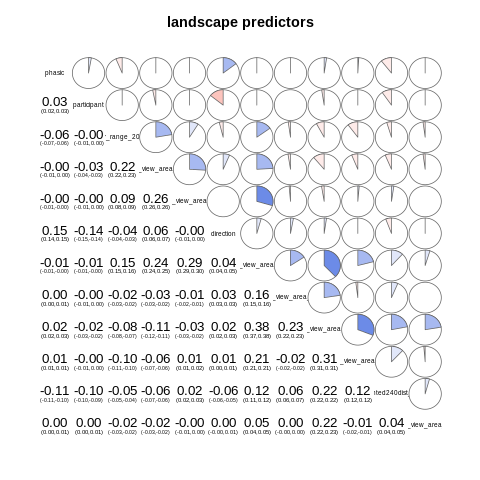

In [0]:
%%R
dat <- read_csv("/content/chips_all_attr.csv")
head(dat)
table(dat$participant)
table(dat$direction)
names(dat)
datCorrel <- dat[c("participant", "phasic", "landuse_view_area_1_20m","landuse_view_area_2_20m","landuse_view_area_3_20m","landuse_view_area_4_20m", 
                   "landuse_view_area_5_20m", "landuse_view_area_6_20m","landuse_view_area_7_20m","weighted240dist_kmh","dir_range_20m","direction")]
corrgram(datCorrel, order=TRUE, lower.panel=panel.conf,
         upper.panel=panel.pie, text.panel=panel.txt,
         main="landscape predictors")
describe(datCorrel)

In [0]:
%%R
# creating models, including a null model
# lme falsely converges
m0 <- lmer(phasic ~ 1 + (1|participant), data=dat, REML=F)
m1 <- lmer(phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + landuse_view_area_3_20m + landuse_view_area_4_20m + 
           landuse_view_area_5_20m + landuse_view_area_6_20m + landuse_view_area_7_20m + (1|participant), data=dat, REML=F)
m2 <- lmer(phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + landuse_view_area_3_20m + landuse_view_area_4_20m + 
             landuse_view_area_5_20m + landuse_view_area_6_20m + landuse_view_area_7_20m + weighted240dist_kmh + direction + (1|participant), data=dat, REML=F)
# m3 <- lmer(phasic ~ landuse_view_area_1_20m*weighted240dist_kmh + landuse_view_area_2_20m*weighted240dist_kmh + landuse_view_area_3_20m*weighted240dist_kmh + landuse_view_area_4_20m*weighted240dist_kmh + 
#              landuse_view_area_5_20m*weighted240dist_kmh + landuse_view_area_6_20m*weighted240dist_kmh + landuse_view_area_7_20m*weighted240dist_kmh + weighted240dist_kmh*weighted240dist_kmh + dir + dist_to_road + (1|participant), data=dat.o, REML=F)
# m4 <- lmer(phasic ~ landuse_view_area_1_20m*weighted240dist_kmh + landuse_view_area_2_20m*weighted240dist_kmh + landuse_view_area_3_20m*weighted240dist_kmh + landuse_view_area_4_20m*weighted240dist_kmh + 
#              landuse_view_area_5_20m*weighted240dist_kmh + landuse_view_area_6_20m*weighted240dist_kmh + landuse_view_area_7_20m*weighted240dist_kmh + weighted240dist_kmh*weighted240dist_kmh + dir + dist_to_road + dir_range_20m + (1|participant), data=dat.o, REML=F)
# m2.1 <- lmer(phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + landuse_view_area_3_20m + landuse_view_area_4_20m + 
#              landuse_view_area_5_20m + landuse_view_area_6_20m + landuse_view_area_7_20m + weighted240dist_kmh + dir + dir_range_20m + (1|participant), data=dat.o, REML=F)
# # w viewarea
# m2.2 <- lmer(phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + landuse_view_area_3_20m + landuse_view_area_4_20m + 
#                landuse_view_area_5_20m + landuse_view_area_6_20m + landuse_view_area_7_20m + weighted240dist_kmh + dir + dist_to_road + dir_range_20m + viewarea + (1|participant), data=dat.o, REML=F)
# comparing models
anova(m0,m1)
anova(m1,m2)
# anova(m2,m3)
# anova(m3,m4)
# anova(m2,m2.1)
# anova(m0,m2)
# anova(m2,m2.1)
# summary(m2.1)
# summary(m2.2) #do not use

Data: dat
Models:
m1: phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + 
m1:     landuse_view_area_3_20m + landuse_view_area_4_20m + landuse_view_area_5_20m + 
m1:     landuse_view_area_6_20m + landuse_view_area_7_20m + (1 | 
m1:     participant)
m2: phasic ~ landuse_view_area_1_20m + landuse_view_area_2_20m + 
m2:     landuse_view_area_3_20m + landuse_view_area_4_20m + landuse_view_area_5_20m + 
m2:     landuse_view_area_6_20m + landuse_view_area_7_20m + weighted240dist_kmh + 
m2:     direction + (1 | participant)
   Df    AIC    BIC  logLik deviance   Chisq Chi Df Pr(>Chisq)    
m1 10 437555 437657 -218767   437535                              
m2 12 434018 434141 -216997   433994 3540.23      2 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


<!-- # References

[The Actual Elevation map of the Netherlands (AHN)]<sup>[3](http://ahn.nl) -->